In [132]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import optimizers, losses
import pathlib
import scipy

tf.__version__

'2.11.0'

In [133]:
training_dir = "C:\\Users\\saaha\\Downloads\\archive\\data\\New Plant Diseases Dataset(Augmented)\\train"
validation_dir = "C:\\Users\\saaha\\Downloads\\archive\\data\\New Plant Diseases Dataset(Augmented)\\valid"

potato_dir = "C:\\Users\\saaha\\Downloads\\archive\\data\\New Plant Diseases Dataset(Augmented)\\train\\Potato___healthy"

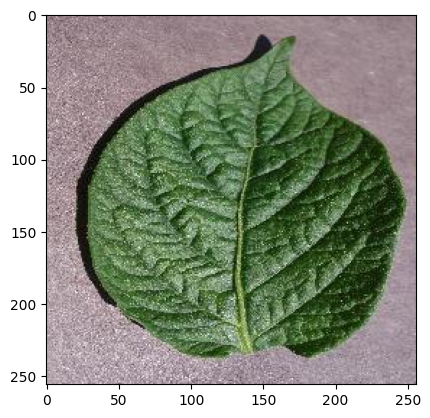

In [134]:
plt.imshow(load_img(f"{os.path.join(potato_dir, os.listdir(potato_dir)[0])}"))

In [135]:
def image_generator(target_dir):
    datagen = ImageDataGenerator(rescale=1/255)

    generator = datagen.flow_from_directory(
        target_dir,
        target_size=(300,300,3),
        class_mode='categorical',
        batch_size=10 #TODO: calculate optimal batch size
    )

    return generator

In [136]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
            print("\nReached 99.9 percent so cancelling training")
            self.model.stop_training = True


In [137]:
train_datagen = image_generator(training_dir)
validation_datagen = image_generator(validation_dir)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [138]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    validation_split=0.2,
    seed=123,
    subset="training",
    image_size=(300, 300),
    batch_size=128
)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.


In [139]:
def train_model(data):
    callbacks = myCallback()

    model = keras.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')

    ])

    model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

    history = model.fit(
        x = data,
        epochs = 5,
        callbacks = [callbacks]
    )

    return history

    



    


In [140]:
hist = train_model(train_ds)

Epoch 1/5
 36/440 [=>............................] - ETA: 13:56 - loss: 50.7846 - accuracy: 0.0319

KeyboardInterrupt: 